<a href="https://colab.research.google.com/github/amithchennavar/HPD_Log_Regression/blob/main/HDP_LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart Disease Prediction & Diagnosis
## Using Logistic Regression
## Dataset Column Description:
* age in years
* sex (1 = male; 0 = female)
* cp chest pain type
* trestbps resting blood pressure (in mm Hg on admission to the hospital)
* chol
serum cholestoral in mg/dl
* fbs
(fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
* restecg
resting electrocardiographic results
* thalach
maximum heart rate achieved
* exang
exercise induced angina (1 = yes; 0 = no)
* oldpeak
ST depression induced by exercise relative to rest
* slope
the slope of the peak exercise ST segment
* ca
number of major vessels (0-3) colored by flourosopy
* thal

Value 0: NULL (dropped from the dataset previously)

Value 1: fixed defect (no blood flow in some part of the heart)

Value 2: normal blood flow

Value 3: reversible defect (a blood flow is observed but it is not normal)

* target
1 or 0

#### Context:
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to  this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 4.

# Table of contents
1. [Imports & reading dataset ](#1)
2. [Data Description](#2)
3. [Data Analysis](#3)
4. [Data Visualization](#4)
5. [Data Pre-processing](#5)
6. [Logistic Regression](#6)
7. [Conclusion](#7)

In [ ]:

from google.colab import files
import io
upload = files.upload()

Saving dataset_heart.csv to dataset_heart (1).csv


# 1.Imports & reading dataset <a name="1"></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv(io.BytesIO(upload['dataset_heart.csv']))

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


# 2.Data Description<a name="2"></a>

### * Describe

There has been lot of confusion about the meta data, as there are various different meta data available out there. Over here below I have got the two most used meta data mentioned below. So we are going to follow the second description.

1 - description

```
It's a clean, easy to understand set of data. However, the meaning of some of the column headers are not obvious. Here's what they mean,
•	age: The person's age in years
•	sex: The person's sex (1 = male, 0 = female)
•	cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
•	trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
•	chol: The person's cholesterol measurement in mg/dl
•	fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
•	restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
•	thalach: The person's maximum heart rate achieved
•	exang: Exercise induced angina (1 = yes; 0 = no)
•	oldpeak: ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
•	slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
•	ca: The number of major vessels (0-3)
•	thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
•	target: Heart disease (0 = no, 1 = yes)
```




2 - description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### * Null

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

No Null values

### * pandas-profiling

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 21.8 MB 220 kB/s
     |████████████████████████████████| 11.1 MB 4.3 MB/s 
     |████████████████████████████████| 596 kB 42.0 MB/s 
     |████████████████████████████████| 102 kB 56.9 MB/s 
     |████████████████████████████████| 690 kB 48.7 MB/s 
     |████████████████████████████████| 4.7 MB 40.0 MB/s 
     |████████████████████████████████| 63 kB 1.8 MB/s 
     |████████████████████████████████| 812 kB 25.7 MB/s 
     |████████████████████████████████| 38.1 MB 1.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=b9b0a56f0960afcbcfa017e11585aa7aef8111a0c5ca74354fa5d2098af343f4
  Stored in directory: /tmp/pip-ephem-wheel-cache-t1z4d967/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=f62cd1bc623dc48df4b0be596e

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# 3.Data Analysis<a name="3"></a>

## * Feature Selection

### 1.Univariate Selection
Univariate Selction — Statistical tests may be used to pick certain features that have the best relationship to the performance variable.
The scikit-learn library provides the SelectKBest class that can be used to select a specific number of features in a suite of different statistical tests.
The following example uses the chi-squared (chi2) statistical test for non-negative features to select 10 of the best features.

In [ ]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = df.copy()
X = data.iloc[:,0:13]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features

       Specs       Score
7    thalach  188.320472
9    oldpeak   72.644253
11        ca   66.440765
2         cp   62.598098
8      exang   38.914377
4       chol   23.936394
0        age   23.286624
3   trestbps   14.823925
10     slope    9.804095
1        sex    7.576835
12      thal    5.791853
6    restecg    2.978271


### 2.Feature Importance
Feature Importance — You can gain the significance of each feature of your dataset by using the Model Characteristics property.
Feature value gives you a score for every function of your results, the higher the score the more significant or appropriate the performance variable is.
Feature importance is the built-in class that comes with Tree Based Classifiers, we will use the Extra Tree Classifier to extract the top 10 features for the dataset.

[0.0706119  0.05465439 0.12334422 0.06761124 0.05894438 0.01897242
 0.03764271 0.09290888 0.09739078 0.07976056 0.07396262 0.11925775
 0.10493814]


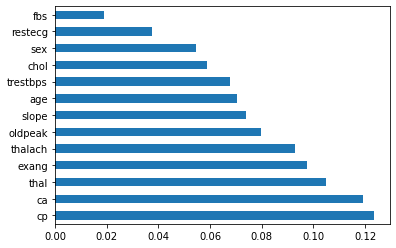

In [ ]:

from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(13).plot(kind='barh')
plt.show()

### 3.Correlation Matrix with Heatmap
Correlation Matrix with Heatmap — Correlation indicates how the features are related to each other or to the target variable.
The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable)
Heatmap makes it easy to classify the features are most relevant to the target variable, and we will plot the associated features of the heatmap using the seaborn library.

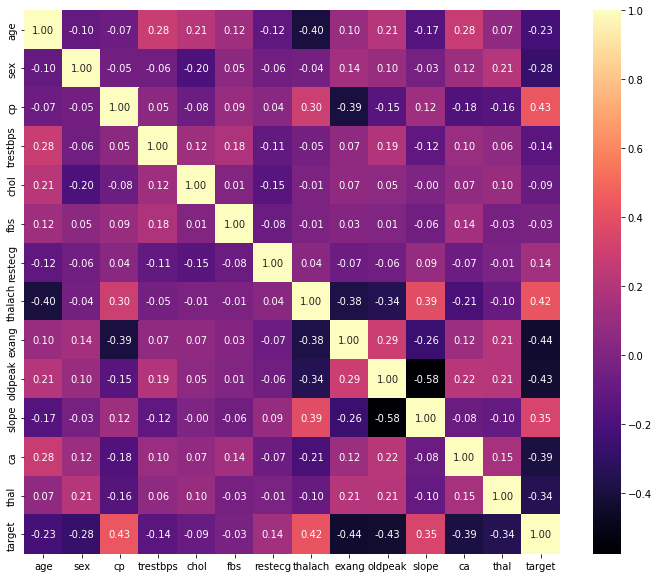

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

# 4.Data Visualizaiton<a name="4"></a>

### * Seaborn

In [ ]:
sns.set_style('darkgrid')
sns.set_palette('Set2')

#### 1.Countplot

In [ ]:
df2 = df.copy()

In [ ]:
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
        
df2['sex'] = df2['sex'].apply(chng)

In [ ]:
def chng2(prob):
    if prob == 0:
        return 'Heart Disease'
    else:
        return 'No Heart Disease'
df2['target'] = df2['target'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s target\n')

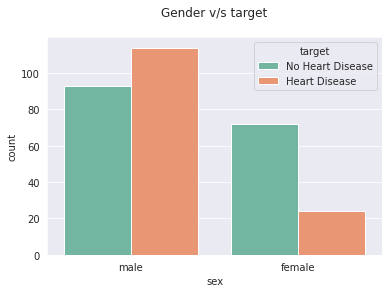

In [ ]:
sns.countplot(data= df2, x='sex',hue='target')
plt.title('Gender v/s target\n')

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

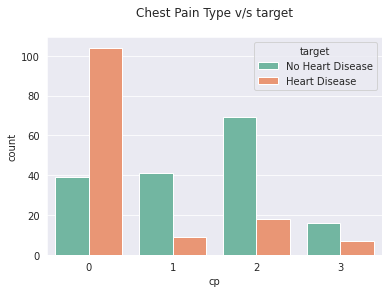

In [ ]:
sns.countplot(data= df2, x='cp',hue='target')
plt.title('Chest Pain Type v/s target\n')

Thalassemia is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen


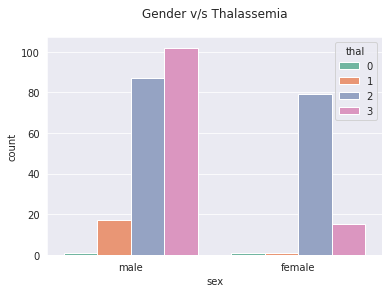

In [ ]:
sns.countplot(data= df2, x='sex',hue='thal')
plt.title('Gender v/s Thalassemia\n')
print('Thalassemia is an inherited blood disorder that causes your body to have less hemoglobin than normal. Hemoglobin enables red blood cells to carry oxygen')

Text(0.5, 1.0, 'Slope v/s Target\n')

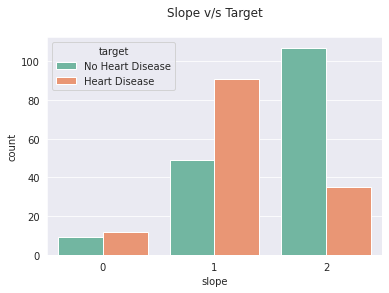

In [ ]:
sns.countplot(data= df2, x='slope',hue='target')
plt.title('Slope v/s Target\n')

Text(0.5, 1.0, 'exang v/s Thalassemia\n')

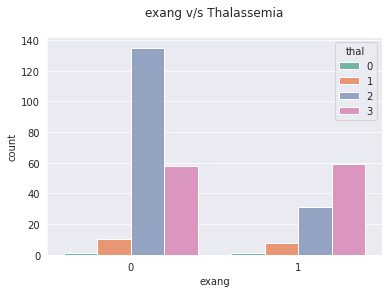

In [ ]:
sns.countplot(data= df2, x='exang',hue='thal')
plt.title('exang v/s Thalassemia\n')

#### 2.Distplot

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age of Heart Diseased Patients\n')

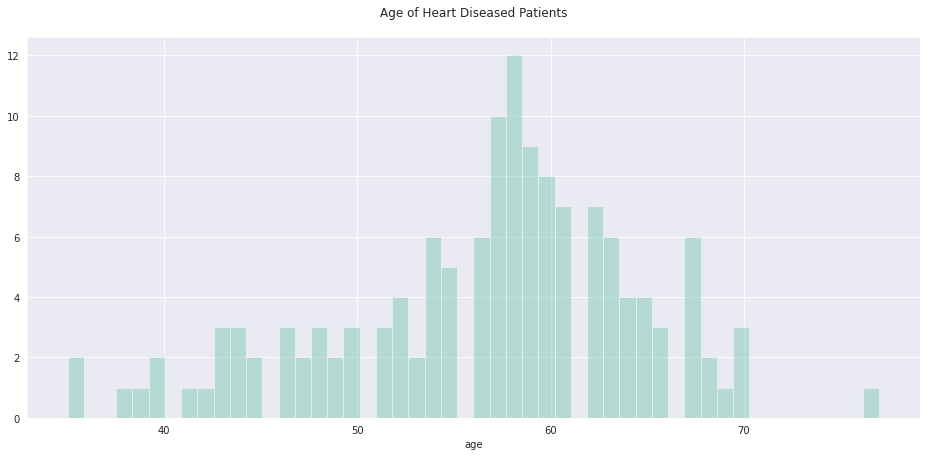

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['age'],kde=False,bins=50)
plt.title('Age of Heart Diseased Patients\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

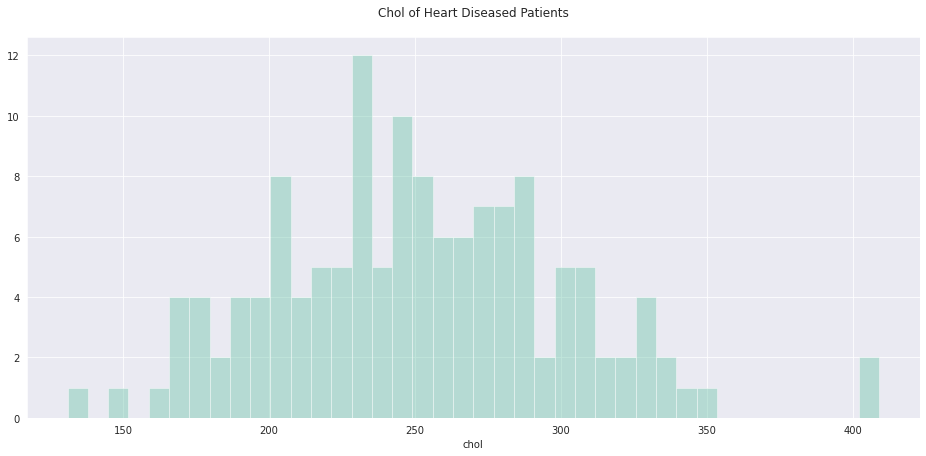

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

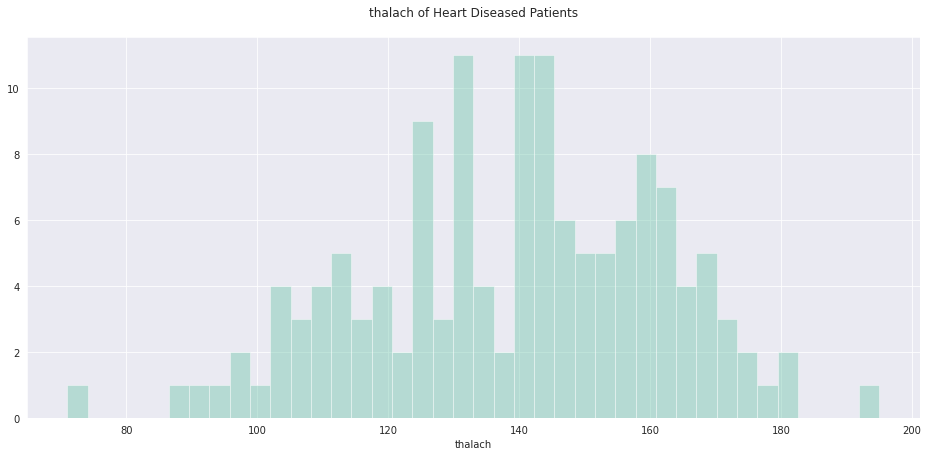

In [ ]:
plt.figure(figsize=(16,7))
sns.distplot(df[df['target']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

#### 3.Jointplot

In [ ]:
df3 = df[df['target'] == 0 ][['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']] #target 0 - people with heart disease

Age vs trestbps(Heart Diseased Patinets)


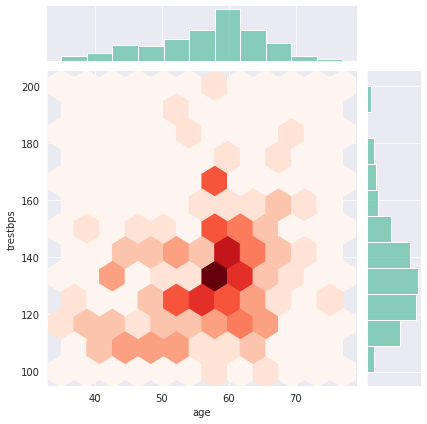

In [ ]:

pal = sns.light_palette("blue", as_cmap=True)


print('Age vs trestbps(Heart Diseased Patinets)')
sns.jointplot(data=df3,
              x='age',
              y='trestbps',
              kind='hex',
              cmap='Reds'
           
              )


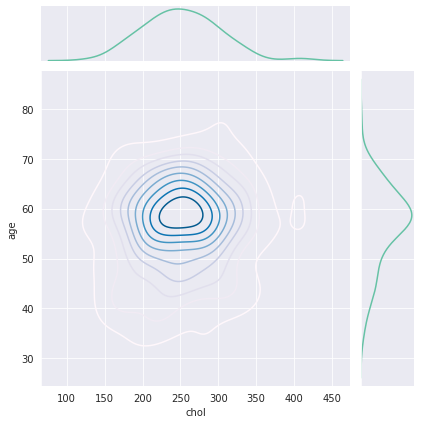

In [ ]:


sns.jointplot(data=df3,
              x='chol',
              y='age',
              kind='kde',
              cmap='PuBu'
              )


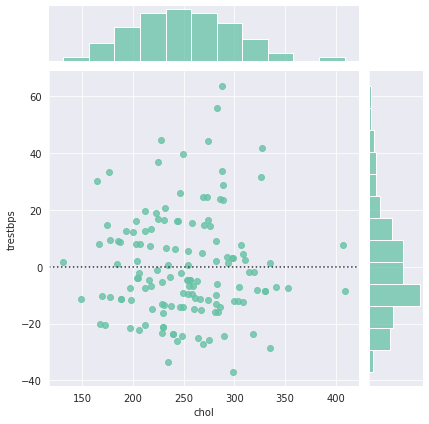

In [ ]:

sns.jointplot(data=df3,
              x='chol',
              y='trestbps',
              kind='resid',
             
              )


# 5.Data Pre-processing<a name="5"></a>

### * Pre-processing

Change Name of the column

In [ ]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']

df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

We have 4 Categorical columns as seen in Data Description using pandas profiling:

cp - chest_pain_type

restecg - rest_ecg_type

slope - st_slope_type

thal - thalassemia_type

Generating categorical columns values

In [ ]:
#cp - chest_pain_type
df.loc[df['chest_pain_type'] == 0, 'chest_pain_type'] = 'asymptomatic'
df.loc[df['chest_pain_type'] == 1, 'chest_pain_type'] = 'atypical angina'
df.loc[df['chest_pain_type'] == 2, 'chest_pain_type'] = 'non-anginal pain'
df.loc[df['chest_pain_type'] == 3, 'chest_pain_type'] = 'typical angina'

#restecg - rest_ecg_type
df.loc[df['rest_ecg_type'] == 0, 'rest_ecg_type'] = 'left ventricular hypertrophy'
df.loc[df['rest_ecg_type'] == 1, 'rest_ecg_type'] = 'normal'
df.loc[df['rest_ecg_type'] == 2, 'rest_ecg_type'] = 'ST-T wave abnormality'

#slope - st_slope_type
df.loc[df['st_slope_type'] == 0, 'st_slope_type'] = 'downsloping'
df.loc[df['st_slope_type'] == 1, 'st_slope_type'] = 'flat'
df.loc[df['st_slope_type'] == 2, 'st_slope_type'] = 'upsloping'

#thal - thalassemia_type
df.loc[df['thalassemia_type'] == 0, 'thalassemia_type'] = 'nothing'
df.loc[df['thalassemia_type'] == 1, 'thalassemia_type'] = 'fixed defect'
df.loc[df['thalassemia_type'] == 2, 'thalassemia_type'] = 'normal'
df.loc[df['thalassemia_type'] == 3, 'thalassemia_type'] = 'reversable defect'


In [ ]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg_type,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope_type,num_major_vessels,thalassemia_type,target
0,63,1,typical angina,145,233,1,left ventricular hypertrophy,150,0,2.3,downsloping,0,fixed defect,1
1,37,1,non-anginal pain,130,250,0,normal,187,0,3.5,downsloping,0,normal,1
2,41,0,atypical angina,130,204,0,left ventricular hypertrophy,172,0,1.4,upsloping,0,normal,1
3,56,1,atypical angina,120,236,0,normal,178,0,0.8,upsloping,0,normal,1
4,57,0,asymptomatic,120,354,0,normal,163,1,0.6,upsloping,0,normal,1


### * One Hot Encoding

In [ ]:
data = pd.get_dummies(df, drop_first=False)
data.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_asymptomatic',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina', 'rest_ecg_type_ST-T wave abnormality',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_downsloping', 'st_slope_type_flat',
       'st_slope_type_upsloping', 'thalassemia_type_fixed defect',
       'thalassemia_type_normal', 'thalassemia_type_nothing',
       'thalassemia_type_reversable defect'],
      dtype='object')

In [ ]:
df_temp = data['thalassemia_type_fixed defect']

In [ ]:
df_temp

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    0
301    0
302    0
Name: thalassemia_type_fixed defect, Length: 303, dtype: uint8

In [ ]:
data = pd.get_dummies(df, drop_first=True)

In [ ]:
data.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect
0,63,1,145,233,1,150,0,2.3,0,1,0,0,1,1,0,0,0,0,0,0
1,37,1,130,250,0,187,0,3.5,0,1,0,1,0,0,1,0,0,1,0,0
2,41,0,130,204,0,172,0,1.4,0,1,1,0,0,1,0,0,1,1,0,0
3,56,1,120,236,0,178,0,0.8,0,1,1,0,0,0,1,0,1,1,0,0
4,57,0,120,354,0,163,1,0.6,0,1,0,0,0,0,1,0,1,1,0,0


Since one hot encoding dropped "thalassemia_type_fixed defect" column which was a useful column compared to 'thalassemia_type_nothing' which is a null column, we dropped 'thalassemia_type_nothing' and concatinated 'thalassemia_type_fixed defect'

In [ ]:
frames = [data, df_temp]
result = pd.concat(frames,axis=1)

result.head()

,age,sex,resting_blood_pressure,cholesterol,fasting_blood_sugar,max_heart_rate_achieved,exercise_induced_angina,st_depression,num_major_vessels,target,...,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,rest_ecg_type_left ventricular hypertrophy,rest_ecg_type_normal,st_slope_type_flat,st_slope_type_upsloping,thalassemia_type_normal,thalassemia_type_nothing,thalassemia_type_reversable defect,thalassemia_type_fixed defect
0,63,1,145,233,1,150,0,2.3,0,1,...,0,1,1,0,0,0,0,0,0,1
1,37,1,130,250,0,187,0,3.5,0,1,...,1,0,0,1,0,0,1,0,0,0
2,41,0,130,204,0,172,0,1.4,0,1,...,0,0,1,0,0,1,1,0,0,0
3,56,1,120,236,0,178,0,0.8,0,1,...,0,0,0,1,0,1,1,0,0,0
4,57,0,120,354,0,163,1,0.6,0,1,...,0,0,0,1,0,1,1,0,0,0


In [ ]:
result.drop('thalassemia_type_nothing',axis=1,inplace=True)
resultc = result.copy()

# 6.Logistic Regression<a name="6"></a>

##### 1.Gather columns

In [ ]:
result.columns

Index(['age', 'sex', 'resting_blood_pressure', 'cholesterol',
       'fasting_blood_sugar', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'num_major_vessels',
       'target', 'chest_pain_type_atypical angina',
       'chest_pain_type_non-anginal pain', 'chest_pain_type_typical angina',
       'rest_ecg_type_left ventricular hypertrophy', 'rest_ecg_type_normal',
       'st_slope_type_flat', 'st_slope_type_upsloping',
       'thalassemia_type_normal', 'thalassemia_type_reversable defect',
       'thalassemia_type_fixed defect'],
      dtype='object')

In [ ]:
X = result.drop('target', axis = 1)
          

In [ ]:
y = result['target']

##### 2.Splitting Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

##### 3.Normalization

In [ ]:
X_train=(X_train-np.min(X_train))/(np.max(X_train)-np.min(X_train)).values
X_test=(X_test-np.min(X_test))/(np.max(X_test)-np.min(X_test)).values

#####4.Fitting into Model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logre = LogisticRegression()

In [ ]:
logre.fit(X_train,y_train)

LogisticRegression()

####5.Prediction

In [ ]:
y_pred = logre.predict(X_test)

In [ ]:
actual = []
predcition = []

for i,j in zip(y_test,y_pred):
  actual.append(i)
  predcition.append(j) 

dic = {'Actual':actual,
       'Prediction':predcition
       }

In [ ]:
result  = pd.DataFrame(dic)

In [ ]:
import plotly.graph_objects as go
 
fig = go.Figure()
 
 
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_test,
                    mode='markers+lines',
                    name='Test'))
fig.add_trace(go.Scatter(x=np.arange(0,len(y_test)), y=y_pred,
                    mode='markers',
                    name='Pred'))

###The red dots represent the predicted values that is either 0 or 1 and the blue line & and dot represents the actual value of that particular patient. In the places where the red dot and blue dot do not overlap are the wrong predictions and where the both dots overlap those are the right predicted values.


###6.Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.8688524590163934


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.83      0.89      0.86        27
           1       0.91      0.85      0.88        34

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



###The classification report of the model shows that 91% prediction of absence of heart disease was predicted correct and 83% of presence of heart disease was predicted correct.

[[24  3]
 [ 5 29]]


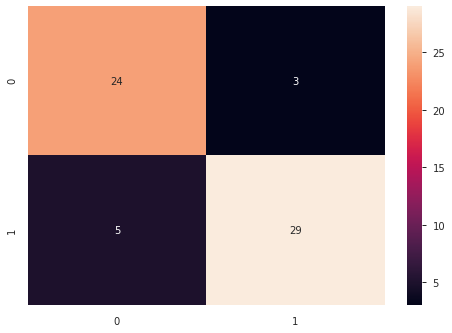

In [ ]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

###The Confusion Matrix True Positive value is 24 and true Negative was 29. And the False Positive came out to be 3 and False Negative is 5

ROC Curve

ROC Curves summarize the trade-off between the true positive rate and false positive rate for a predictive model using different probability thresholds.

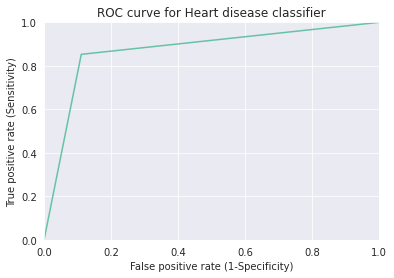

In [ ]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Heart disease classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [ ]:
import sklearn
sklearn.metrics.roc_auc_score(y_test,y_pred)


0.8709150326797386

#7.Conclusion<a name="7"></a>

###1.Coefficients

In [ ]:
print(logre.intercept_)
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
coeffecients

[0.96772424]


,Coeffecient
chest_pain_type_non-anginal pain,1.281633
chest_pain_type_typical angina,1.036787
max_heart_rate_achieved,1.028382
thalassemia_type_normal,0.754872
chest_pain_type_atypical angina,0.732086
rest_ecg_type_normal,0.338507
st_slope_type_upsloping,0.212089
rest_ecg_type_left ventricular hypertrophy,0.066738
thalassemia_type_fixed defect,0.009411
fasting_blood_sugar,-0.135551


<Figure size 720x864 with 0 Axes>

In [ ]:
df.columns

Index(['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target'],
      dtype='object')

In [ ]:
df4 = df[df['target'] == 0 ][['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
       'cholesterol', 'fasting_blood_sugar', 'rest_ecg_type',
       'max_heart_rate_achieved', 'exercise_induced_angina', 'st_depression',
       'st_slope_type', 'num_major_vessels', 'thalassemia_type', 'target']] #target 0 - people with heart disease

##2.Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



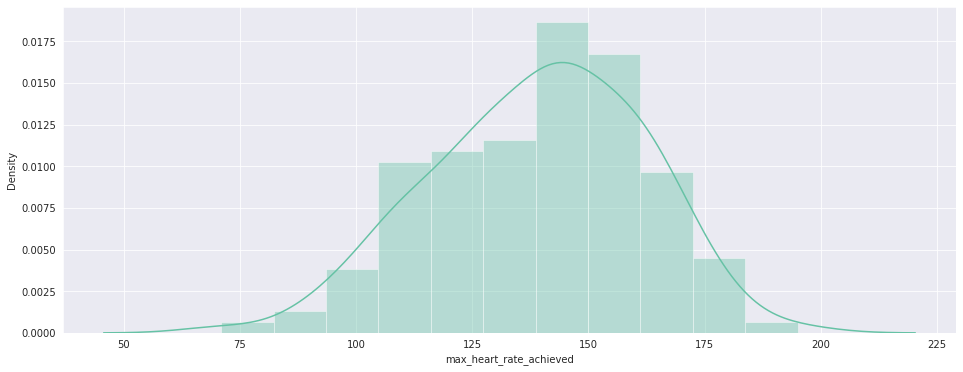

In [ ]:
plt.figure(figsize=(16,6))
sns.distplot(df4['max_heart_rate_achieved'])

###Normal Heart rate is found to be between 60 and 100 bpm. Some areas of cardiac muscles will start to die during a Heart Attack because of Lack of Blood. A person’s pulse may become slower (bradycardia) or faster (tachycardiac) depending on the type of Heart Attack they are experiencing.

Shap Values

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 564 kB 4.1 MB/s 


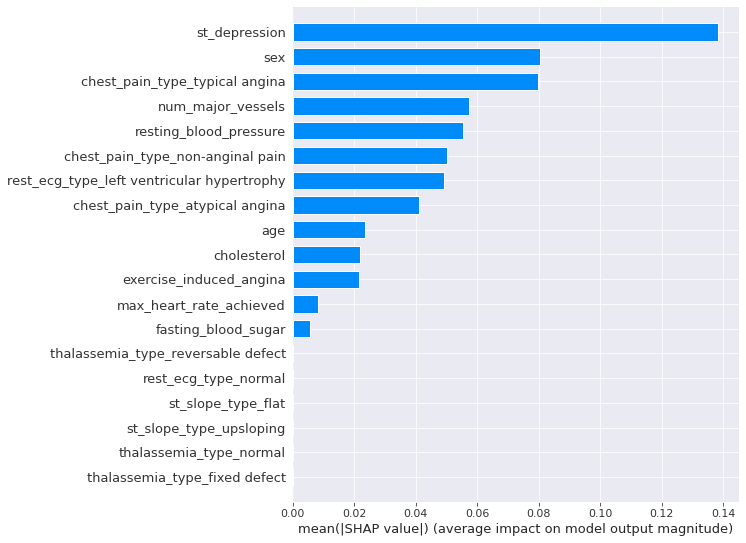

In [ ]:
!pip install shap 
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test,check_additivity=False)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

##3.Conclusion


*  The Area under the ROC curve is 87.09% which is somewhat satisfactory.
*  The model predicted with 86.88% accuracy. The model is more specific than sensitive.
*  According to this model the major features contributing in precision of predciting model are shown in the heatmap in order.






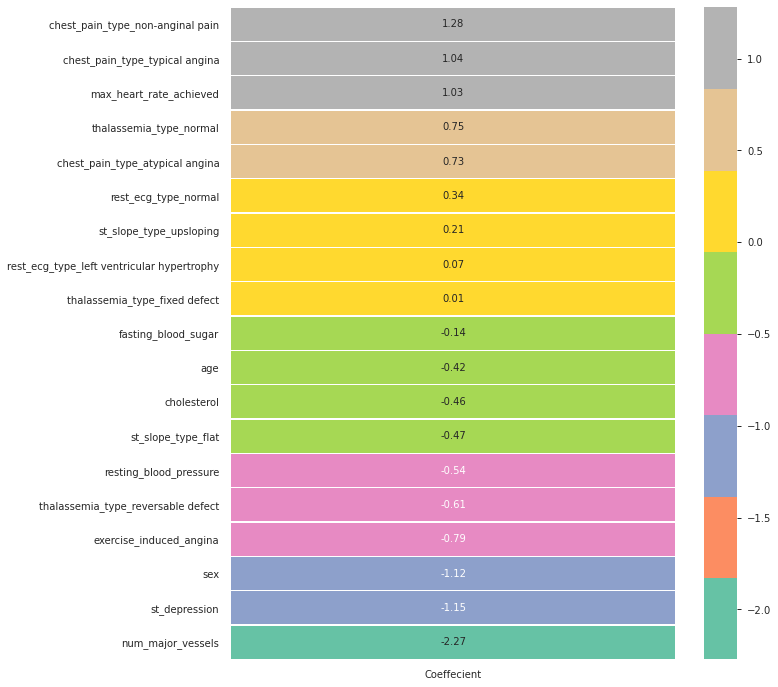

In [ ]:
plt.figure(figsize=(10,12))
coeffecients = pd.DataFrame(logre.coef_.ravel(),X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients.sort_values(by=['Coeffecient'],inplace=True,ascending=False)
sns.heatmap(coeffecients,annot=True,fmt='.2f',cmap='Set2',linewidths=0.5)